In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
sc.logging.print_versions()
sc.set_figure_params(frameon=False, figsize=(4, 4))

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.3.1
backcall            0.2.0
cached_property     1.5.2
cffi                1.14.6
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           5.0.9
defusedxml          0.7.1
get_version         2.1
h5py                3.1.0
igraph              0.9.6
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.17.0
joblib   

In [3]:
#! mkdir -p data
#! wget http://cf.10xgenomics.com/samples/cell-exp/3.1.0/5k_pbmc_protein_v3_nextgem/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5 -O data/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5

In [2]:
datafile = "MIA_iRNA.h5ad"

In [3]:
MIA_RNA = sc.read_h5ad(datafile)
MIA_RNA.var_names_make_unique()
MIA_RNA.layers["counts"] = MIA_RNA.X.copy()
#sc.pp.filter_genes(MIA_RNA, min_counts=1)
MIA_RNA

/home/apratapa/anaconda3/envs/scanp36/lib/python3.6/site-packages/anndata/_core/anndata.py:891: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  names = self._prep_dim_index(names, "var")


AnnData object with n_obs × n_vars = 20211 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI_mouse', 'nUMI_human', 'nUMI_all', 'percent.mito', 'percent.mouse', 'percent.mouse.mito', 'percent.human', 'percent.ribo', 'GRCh38', 'mm10', 'call', 'Estimated.Number.of.Cells', 'Mean.Reads.per.Cell', 'Number.of.Reads', 'Valid.Barcodes', 'Sequencing.Saturation', 'Q30.Bases.in.Barcode', 'Q30.Bases.in.RNA.Read', 'Q30.Bases.in.Sample.Index', 'Q30.Bases.in.UMI', 'Reads.Mapped.to.Genome', 'GRCh38.Reads.Mapped.to.Genome', 'mm10.Reads.Mapped.to.Genome', 'Reads.Mapped.Confidently.to.Genome', 'GRCh38.Reads.Mapped.Confidently.to.Genome', 'mm10.Reads.Mapped.Confidently.to.Genome', 'Reads.Mapped.Confidently.to.Intergenic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intergenic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intergenic.Regions', 'Reads.Mapped.Confidently.to.Intronic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intronic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intronic.Regions

In [4]:
MIA_RNA.var["mito"] = MIA_RNA.var_names.str.startswith("MT-")
MIA_RNA.var["mm10"] = MIA_RNA.var_names.str.startswith("mm10-")
MIA_RNA.var["keep"] = ~(MIA_RNA.var["mito"] | MIA_RNA.var["mm10"])
#sc.pp.calculate_qc_metrics(MIA_RNA, qc_vars=["mito", "mm10"], inplace=True)

In [7]:
#sc.pp.normalize_total(MIA_RNA)
#sc.pp.log1p(MIA_RNA)

In [5]:
MIA_RNA.raw = MIA_RNA
MIA_RNA = MIA_RNA[:,MIA_RNA.var['keep']]
#sc.pp.highly_variable_genes(MIA_RNA, flavor='seurat', n_top_genes=5000, subset=True)
#sc.pp.regress_out(MIA_RNA,['total_counts','pct_counts_mito','pct_counts_mm10'])
#sc.pp.scale(MIA_RNA, max_value=10)

In [6]:
#sc.pp.regress_out(MIA_RNA,['pct_counts_mito','pct_counts_mm10'])

In [7]:
sc.pp.pca(MIA_RNA)
sc.pp.neighbors(MIA_RNA) 
sc.tl.umap(MIA_RNA)

In [29]:
sc.tl.leiden(MIA_RNA, resolution =0.6,  key_added="rna_leiden")

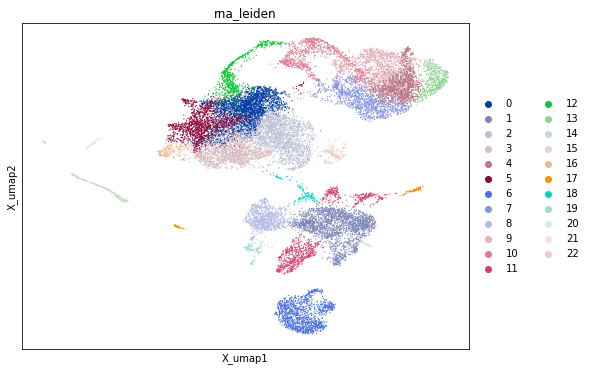

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,6))
sc.pl.embedding(MIA_RNA, basis='X_umap', color=['rna_leiden'], ax=ax)

## Protein

In [49]:
datafile = "MIA_iADT.h5ad"
MIA_ADT = sc.read_h5ad(datafile)
MIA_ADT.var_names_make_unique()
MIA_ADT.layers["counts"] = MIA_ADT.X.copy()
#sc.pp.filter_genes(MIA_ADT, min_counts=1)
MIA_ADT

/home/apratapa/anaconda3/envs/scanp36/lib/python3.6/site-packages/anndata/_core/anndata.py:891: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  names = self._prep_dim_index(names, "var")


AnnData object with n_obs × n_vars = 20211 × 138
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI_mouse', 'nUMI_human', 'nUMI_all', 'percent.mito', 'percent.mouse', 'percent.mouse.mito', 'percent.human', 'percent.ribo', 'GRCh38', 'mm10', 'call', 'Estimated.Number.of.Cells', 'Mean.Reads.per.Cell', 'Number.of.Reads', 'Valid.Barcodes', 'Sequencing.Saturation', 'Q30.Bases.in.Barcode', 'Q30.Bases.in.RNA.Read', 'Q30.Bases.in.Sample.Index', 'Q30.Bases.in.UMI', 'Reads.Mapped.to.Genome', 'GRCh38.Reads.Mapped.to.Genome', 'mm10.Reads.Mapped.to.Genome', 'Reads.Mapped.Confidently.to.Genome', 'GRCh38.Reads.Mapped.Confidently.to.Genome', 'mm10.Reads.Mapped.Confidently.to.Genome', 'Reads.Mapped.Confidently.to.Intergenic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intergenic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intergenic.Regions', 'Reads.Mapped.Confidently.to.Intronic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intronic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intronic.Regions'

In [50]:
MIA_ADT.var["keep"] = [not(('Rat' in x) | ('Mouse' in x) | ('Arm' in x)) for x in MIA_ADT.var["features"] ]
MIA_ADT = MIA_ADT[:,MIA_ADT.var['keep']]

In [51]:
#sc.pp.normalize_total(MIA_ADT)
#sc.pp.log1p(MIA_ADT)

In [52]:
sc.pp.pca(MIA_ADT)
sc.pp.neighbors(MIA_ADT)
sc.tl.umap(MIA_ADT)

In [47]:
sc.tl.leiden(MIA_ADT, resolution=0.7, key_added="adt_leiden")

/home/apratapa/anaconda3/envs/scanp36/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


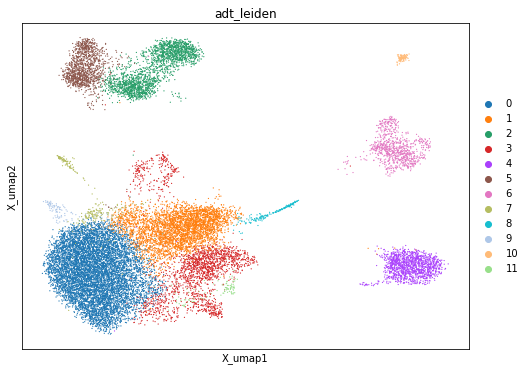

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,6))
sc.pl.embedding(MIA_ADT, basis='X_umap', color=['adt_leiden'], ax=ax)

In [38]:
MIA_RNA.obsm["protein"] = MIA_ADT.to_df()
MIA_RNA.obsm["protein_umap"] = MIA_ADT.obsm["X_umap"]
MIA_RNA.obs["protein_leiden"] = MIA_ADT.obs["adt_leiden"]
MIA_RNA.obsp["rna_connectivities"] = MIA_RNA.obsp["connectivities"].copy()
MIA_RNA.obsp["protein_connectivities"] = MIA_ADT.obsp["connectivities"]

In [39]:
sc.tl.umap(MIA_RNA)


/home/apratapa/anaconda3/envs/scanp36/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


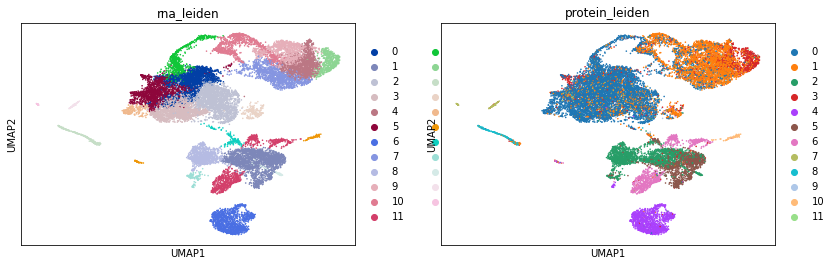

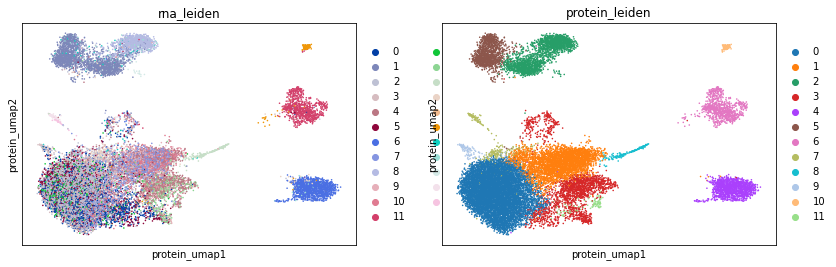

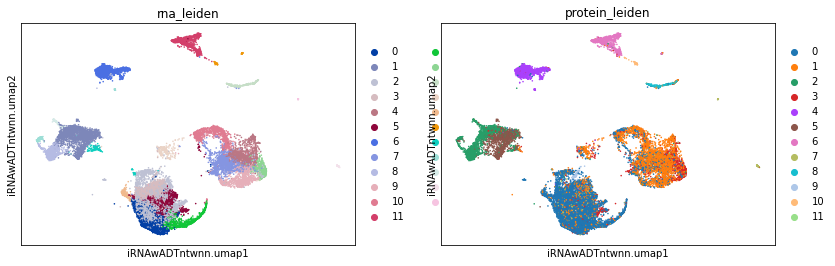

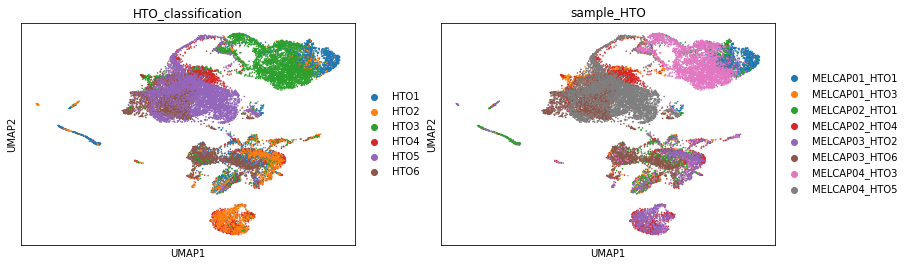

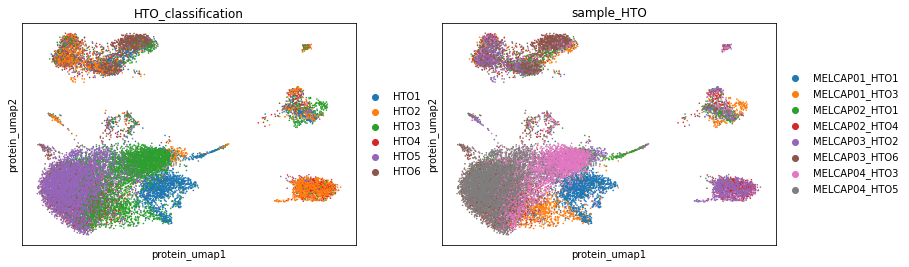

In [53]:
sc.pl.umap(MIA_RNA, color=["rna_leiden", "protein_leiden"], size=10)
sc.pl.embedding(MIA_RNA, basis="protein_umap", color=["rna_leiden", "protein_leiden"], size=10)
sc.pl.embedding(MIA_RNA, basis="iRNAwADTntwnn.umap", color=["rna_leiden", "protein_leiden"], size=10)

sc.pl.umap(MIA_RNA, color=["HTO_classification", "sample_HTO"], size=10)
sc.pl.embedding(MIA_RNA, basis="protein_umap", color=["HTO_classification", "sample_HTO"], size=10)

In [62]:
from pyHelpers.helpers import *

In [63]:
leiden_multiplex(MIA_RNA, ["rna_connectivities", "protein_connectivities"])  # Adds key "leiden_multiplex" by default


In [64]:
MIA_RNA

AnnData object with n_obs × n_vars = 20211 × 4892
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI_mouse', 'nUMI_human', 'nUMI_all', 'percent.mito', 'percent.mouse', 'percent.mouse.mito', 'percent.human', 'percent.ribo', 'GRCh38', 'mm10', 'call', 'Estimated.Number.of.Cells', 'Mean.Reads.per.Cell', 'Number.of.Reads', 'Valid.Barcodes', 'Sequencing.Saturation', 'Q30.Bases.in.Barcode', 'Q30.Bases.in.RNA.Read', 'Q30.Bases.in.Sample.Index', 'Q30.Bases.in.UMI', 'Reads.Mapped.to.Genome', 'GRCh38.Reads.Mapped.to.Genome', 'mm10.Reads.Mapped.to.Genome', 'Reads.Mapped.Confidently.to.Genome', 'GRCh38.Reads.Mapped.Confidently.to.Genome', 'mm10.Reads.Mapped.Confidently.to.Genome', 'Reads.Mapped.Confidently.to.Intergenic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intergenic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intergenic.Regions', 'Reads.Mapped.Confidently.to.Intronic.Regions', 'GRCh38.Reads.Mapped.Confidently.to.Intronic.Regions', 'mm10.Reads.Mapped.Confidently.to.Intronic.Regions

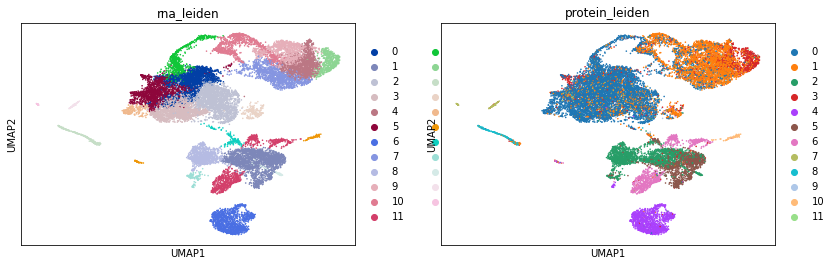

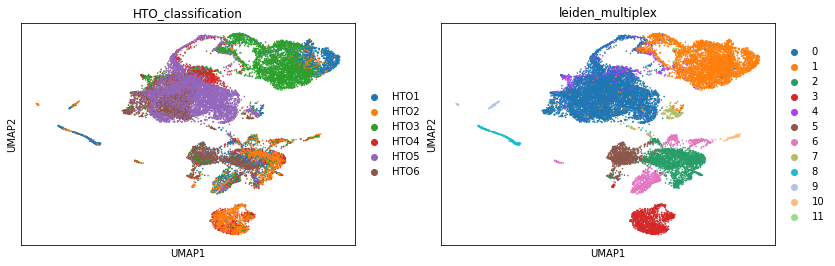

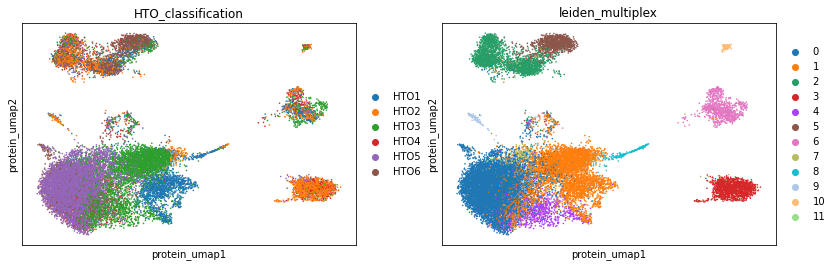

In [65]:
sc.pl.umap(MIA_RNA, color=["rna_leiden", "protein_leiden"], size=10)
#sc.pl.embedding(MIA_RNA, basis="protein_umap", color=["rna_leiden", "protein_leiden"], size=10)
#sc.pl.embedding(MIA_RNA, basis="iRNAwADTntwnn.umap", color=["leiden_multiplex"], size=10)
sc.pl.umap(MIA_RNA, color=["HTO_classification", "leiden_multiplex"], size=10)
sc.pl.embedding(MIA_RNA, basis="protein_umap", color=["HTO_classification", "leiden_multiplex"], size=10)
#sc.pl.umap(MIA_RNA, color=["HTO_classification", "sample_HTO"], size=10)
#sc.pl.embedding(MIA_RNA, basis="protein_umap", color=["HTO_classification", "sample_HTO"], size=10)

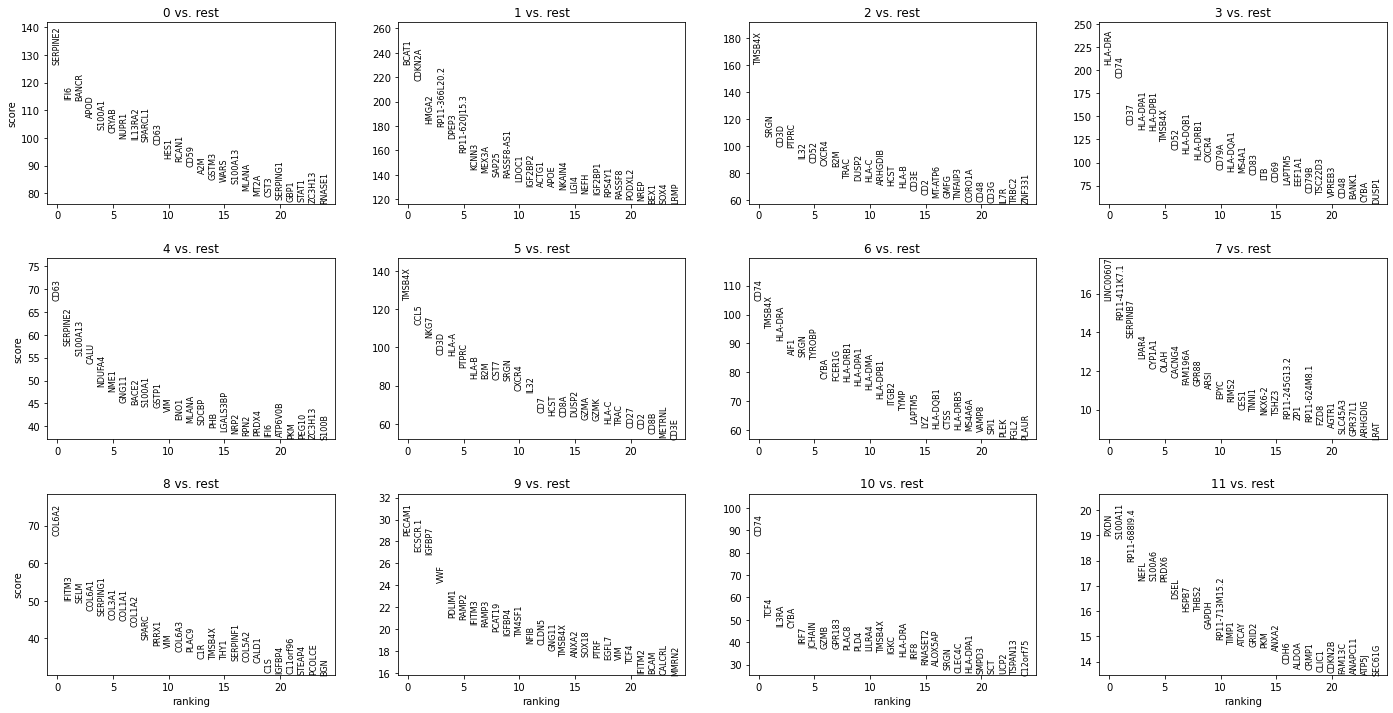

In [67]:
sc.tl.rank_genes_groups(MIA_RNA, 'leiden_multiplex', method='t-test')
sc.pl.rank_genes_groups(MIA_RNA, n_genes=25, sharey=False)

In [69]:
pd.DataFrame(MIA_RNA.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,SERPINE2,BCAT1,TMSB4X,HLA-DRA,CD63,TMSB4X,CD74,LINC00607,COL6A2,PECAM1,CD74,PXDN
1,IFI6,CDKN2A,SRGN,CD74,SERPINE2,CCL5,TMSB4X,RP11-411K7.1,IFITM3,ECSCR.1,TCF4,S100A11
2,BANCR,HMGA2,CD3D,CD37,S100A13,NKG7,HLA-DRA,SERPINB7,SELM,IGFBP7,IL3RA,RP11-688I9.4
3,APOD,RP11-366L20.2,PTPRC,HLA-DPA1,CALU,CD3D,AIF1,LPAR4,COL6A1,VWF,CYBA,NEFL
4,S100A1,DPEP3,IL32,HLA-DPB1,NDUFA4,HLA-A,SRGN,CYP1A1,SERPING1,PDLIM1,IRF7,S100A6


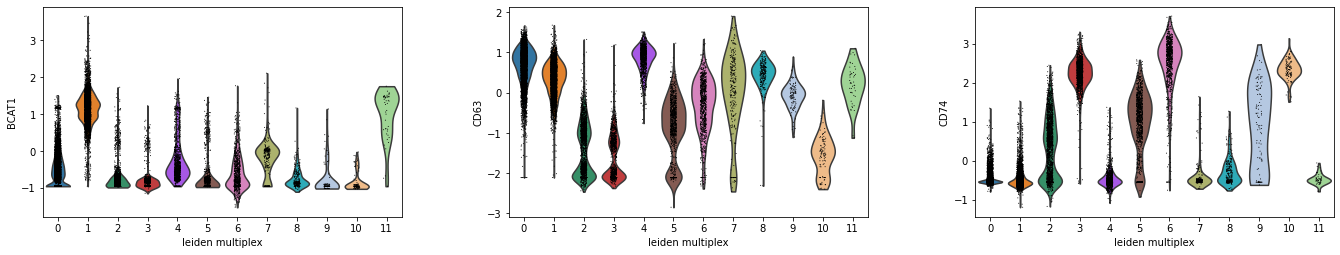

In [74]:
#sc.pl.rank_genes_groups_violin(MIA_RNA, groups='0', n_genes=8)
sc.pl.violin(MIA_RNA, ['BCAT1', 'CD63', 'CD74'], groupby='leiden_multiplex')


In [71]:
result = MIA_RNA.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p,11_n,11_p
0,SERPINE2,0.0,BCAT1,0.0,TMSB4X,0.0,HLA-DRA,0.0,CD63,0.0,...,LINC00607,4.358777e-40,COL6A2,8.666664e-158,PECAM1,9.199840e-51,CD74,8.869651e-109,PXDN,6.036262e-24
1,IFI6,0.0,CDKN2A,0.0,SRGN,0.0,CD74,0.0,SERPINE2,0.0,...,RP11-411K7.1,6.000894e-36,IFITM3,2.008308e-132,ECSCR.1,9.956402e-49,TCF4,2.097554e-74,S100A11,1.235265e-23
2,BANCR,0.0,HMGA2,0.0,CD3D,0.0,CD37,0.0,S100A13,0.0,...,SERPINB7,8.122388e-33,SELM,1.852679e-128,IGFBP7,2.096773e-48,IL3RA,1.084000e-70,RP11-688I9.4,1.379375e-22
3,APOD,0.0,RP11-366L20.2,0.0,PTPRC,0.0,HLA-DPA1,0.0,CALU,0.0,...,LPAR4,3.869998e-29,COL6A1,5.932686e-124,VWF,1.977942e-44,CYBA,2.102486e-72,NEFL,9.823007e-22
4,S100A1,0.0,DPEP3,0.0,IL32,0.0,HLA-DPB1,0.0,NDUFA4,0.0,...,CYP1A1,2.423117e-27,SERPING1,3.085905e-123,PDLIM1,3.624013e-39,IRF7,1.484017e-63,S100A6,7.429780e-22


In [77]:
MIA_ADT.obs['leiden_multiplex']  = MIA_RNA.obs['leiden_multiplex']

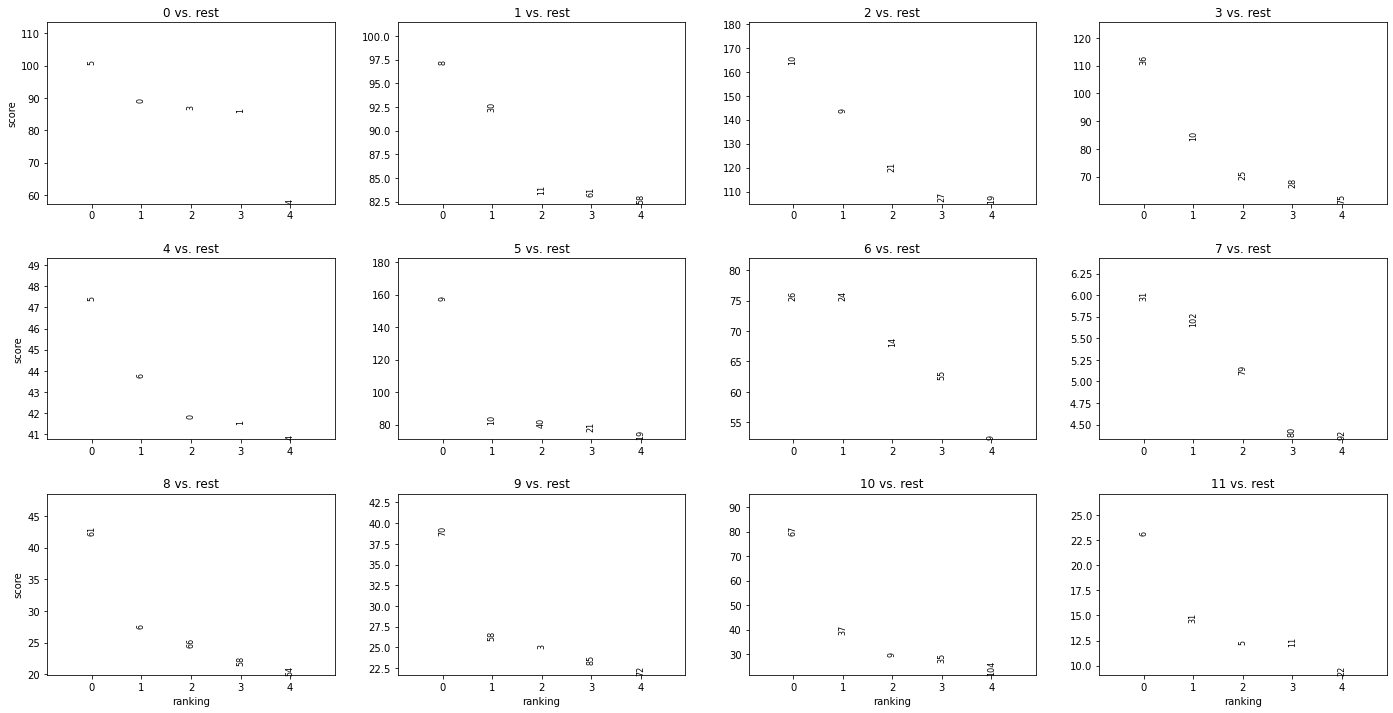

In [79]:
sc.tl.rank_genes_groups(MIA_ADT, 'leiden_multiplex', method='t-test')
sc.pl.rank_genes_groups(MIA_ADT, n_genes=5, sharey=False)

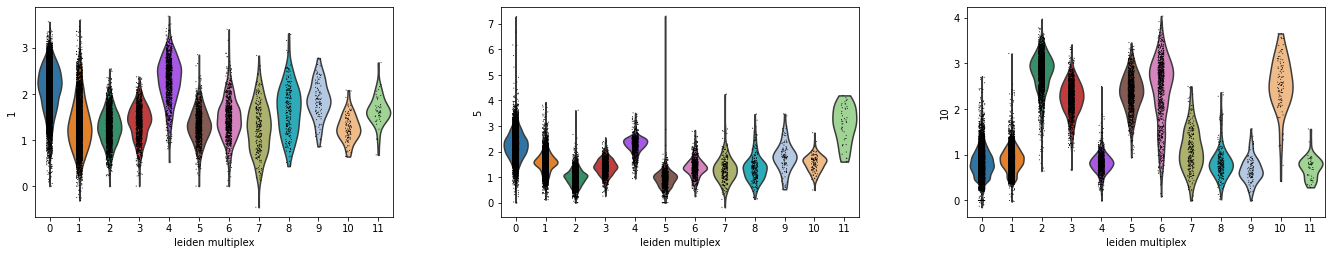

In [84]:
sc.pl.violin(MIA_ADT, ['1', '5', '10'], groupby='leiden_multiplex')


/home/apratapa/anaconda3/envs/scanp36/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


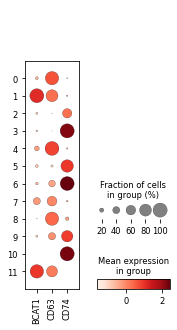

In [86]:
sc.pl.dotplot(MIA_RNA, ['BCAT1', 'CD63', 'CD74'], groupby='leiden_multiplex');


In [ ]:
sc.__version__

In [94]:
allCITE = MIA_ADT.var_names
nameMap = {cte:cte.split('-')[1] for cte in allCITE}
keepIDs = []
newNames =[]
for ix in range(len(allCITE)):
    if 'iso' not in allCITE[ix]:
        keepIDs.append(ix)
        newNames.append(nameMap[allCITE[ix]].replace('.','-'))
newNames


['CD66a-c-e',
 'HLA-A-B-C',
 'CD47',
 'CD49f',
 'LFA-3',
 'CD55',
 'CD29',
 'CCR6',
 'MCAM',
 'CD11a',
 'CD48',
 'PVR',
 'FAS',
 'CD133',
 'CD39',
 'CD324',
 'TIM3',
 'CD7',
 'CD49a',
 'CD3',
 'CD62L',
 'CD2',
 'CD49b',
 'CD69',
 'HLA-DR',
 'CD40',
 'CD11C',
 'CD5',
 'CD20',
 'CD38',
 'CD49d',
 'CD73',
 'CD10',
 'CD15',
 'PDL1',
 'CD4',
 'CD22',
 'CD36',
 'HER2',
 'CD45RO',
 'ICOS',
 'CR1',
 'B7H3',
 'IgG-Fc',
 'CD127',
 'TCRab',
 'CD206',
 'B7H4',
 'CD8A',
 'CD268',
 'BTLA',
 'CD45RA',
 'CCR5',
 'IgM',
 'EGFR',
 'CD32',
 'CD163',
 'CD103',
 'CD112',
 'DNAM1',
 'Thy1',
 'CD57',
 'IntegrinB7',
 'CXCR4',
 'PDGFRb',
 'Podoplanin',
 'CD123',
 'PD1',
 'CD25',
 'CD31',
 'IgD',
 'CD34',
 'CD27',
 'HVEM',
 'CD21',
 'CD86',
 'CD56',
 'CD28',
 'CCR3',
 'NKG2D',
 '2B4',
 'CD1C',
 'TIGIT',
 'cKIT',
 'CD141',
 'CD267',
 'KLRG1',
 'CRTH2',
 'CD24',
 'CXCR6',
 'CD11b',
 'OX40',
 'CD16',
 'CD14',
 '4-1BB',
 'CD1d',
 'CD119',
 'CD135',
 'PD-L2',
 'ICAM2',
 'CCR4',
 'TCRVa7-2',
 'CD303',
 'NKP46',
 'CD4

In [100]:
sum(MIA_ADT.obs.index == MIA_RNA.obs.index)

20211

In [136]:
pd.DataFrame(MIA_RNA.X, index=MIA_RNA.obs.index, columns=MIA_RNA.var.index).to_csv('../rawData/MIA_iRNA.csv')
pd.DataFrame(MIA_ADT.X, index=MIA_ADT.obs.index, columns=newNames).to_csv('../rawData/MIA_iADT.csv')

In [137]:
pd.DataFrame(MIA_RNA.obsm['X_pca'], index=MIA_RNA.obs.index, columns=['PC'+str(x) for x in range(MIA_RNA.obsm['X_pca'].shape[1])]).to_csv('../rawData/MIA_iPC_latent.csv')

umapDF = pd.DataFrame(MIA_RNA.obsm['X_umap'], index=MIA_RNA.obs.index, columns=['UMAP0','UMAP1'])#.to_csv('../rawData/MIA_PC_latent.RDS')
umapDF['leidenClust'] = MIA_RNA.obs['leiden_multiplex']
umapDF.to_csv('../rawData/MIA_iUmap.csv')
#MIA_RNA.obsm['X_pca'].shape

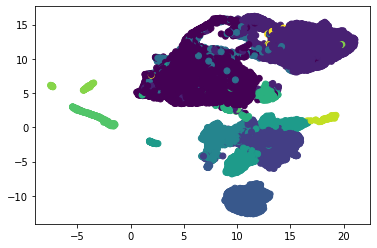

In [134]:
import matplotlib.pyplot as plt
plt.scatter(umapDF.UMAP0,umapDF.UMAP1,c=[int(x) for x in umapDF.leidenClust.values], cmap='viridis')#(type='scatter')

In [95]:
len(newNames)

131

In [ ]:
datafile = "MIA11_Prog_ADT.h5ad"
MIA_ADT22 = sc.read_h5ad(datafile)
for x in MIA_ADT22.var['features']:
    print(x)

sc.tl.embedding_density(MIA_RNA, basis="umap", groupby="sample_HTO")#,"species"])#, size=10)

MIA_RNA

sc.pl.embedding_density(MIA_RNA, basis='umap', key='umap_density_rna_leiden')#, group='Negative')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,10))
sc.pl.embedding(MIA_RNA, basis='X_umap', color=['sample_HTO'], ax=ax, size=10)

sc.pl.embedding(MIA_RNA, basis='X_umap', color=['sample_HTO'])#, group='Negative')